In [2]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline  

In [3]:
bcs = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv')

In [4]:
bcs.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
bcs.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [31]:
bcs.isnull().sum()

Age                   0
Years_of_operation    0
Pos_axillary_nodes    0
Status                0
age_Group             4
Nodes_Group           1
dtype: int64

In [32]:
bcs.shape

(306, 6)

In [8]:
bcs.Years_of_operation.unique()

array([64, 62, 65, 59, 58, 60, 66, 61, 67, 63, 69, 68], dtype=int64)

In [9]:
bcs.Pos_axillary_nodes.unique()

array([ 1,  3,  0,  2,  4, 10,  9, 30,  7, 13,  6, 15, 21, 11,  5, 23,  8,
       20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28],
      dtype=int64)

In [10]:
bcs.Age.unique()

array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83],
      dtype=int64)

In [11]:
bcs.Status.unique()

array([1, 2], dtype=int64)

In [53]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(bcs)
profile.to_file(outputfile="bcs.html") 

In [54]:
bcs['age_Group'] = pd.cut(bcs['Age'].dropna(),
                         [0,15,30,45,60,75],
#                         labels=['<18','18-24','25-34','35-44','45+'], include_lowest=True)
                         labels=['<15','15-29','30-44','45-59','60+'], include_lowest=True)


In [55]:
bcs['age_Group'].count

<bound method Series.count of 0      15-29
1      15-29
2      15-29
3      30-44
4      30-44
5      30-44
6      30-44
7      30-44
8      30-44
9      30-44
10     30-44
11     30-44
12     30-44
13     30-44
14     30-44
15     30-44
16     30-44
17     30-44
18     30-44
19     30-44
20     30-44
21     30-44
22     30-44
23     30-44
24     30-44
25     30-44
26     30-44
27     30-44
28     30-44
29     30-44
       ...  
276      60+
277      60+
278      60+
279      60+
280      60+
281      60+
282      60+
283      60+
284      60+
285      60+
286      60+
287      60+
288      60+
289      60+
290      60+
291      60+
292      60+
293      60+
294      60+
295      60+
296      60+
297      60+
298      60+
299      60+
300      60+
301      60+
302      NaN
303      NaN
304      NaN
305      NaN
Name: age_Group, Length: 306, dtype: category
Categories (5, object): [<15 < 15-29 < 30-44 < 45-59 < 60+]>

Text(0.5, 1.0, 'Age vs Status')

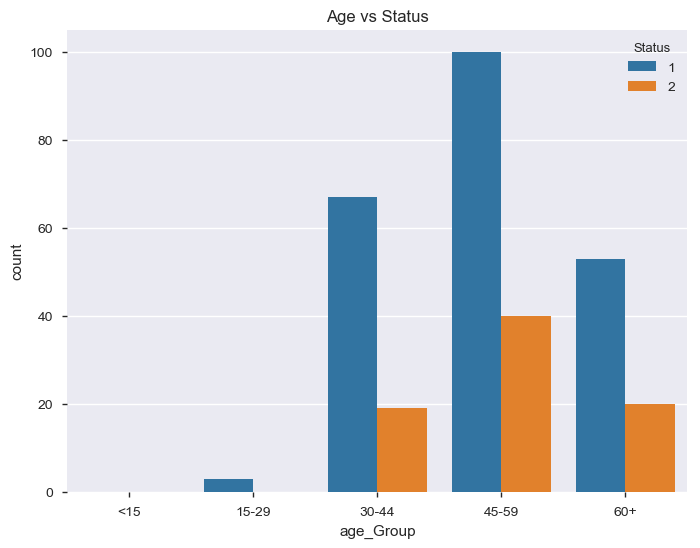

In [56]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = bcs, x = 'age_Group', hue = 'Status')
plt.title('Age vs Status')

Text(0.5, 1.0, 'Pos_axillary_nodes vs age_Group')

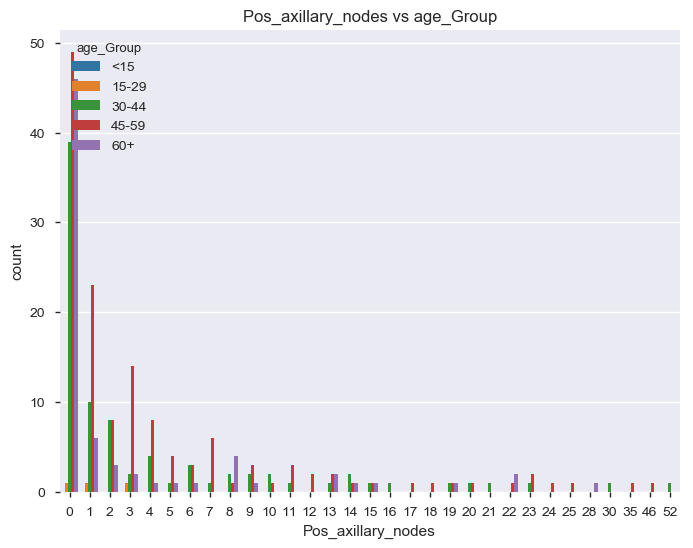

In [57]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = bcs, x = 'Pos_axillary_nodes', hue = 'age_Group')
plt.title('Pos_axillary_nodes vs age_Group')

In [58]:
features = bcs.corr()
print(features)

                         Age  Years_of_operation  Pos_axillary_nodes    Status
Age                 1.000000            0.089529           -0.063176  0.067950
Years_of_operation  0.089529            1.000000           -0.003764 -0.004768
Pos_axillary_nodes -0.063176           -0.003764            1.000000  0.286768
Status              0.067950           -0.004768            0.286768  1.000000


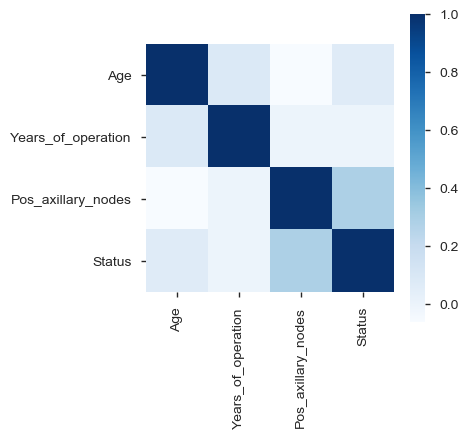

In [59]:
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

Text(0.5, 1.0, 'Nodes vs Status')

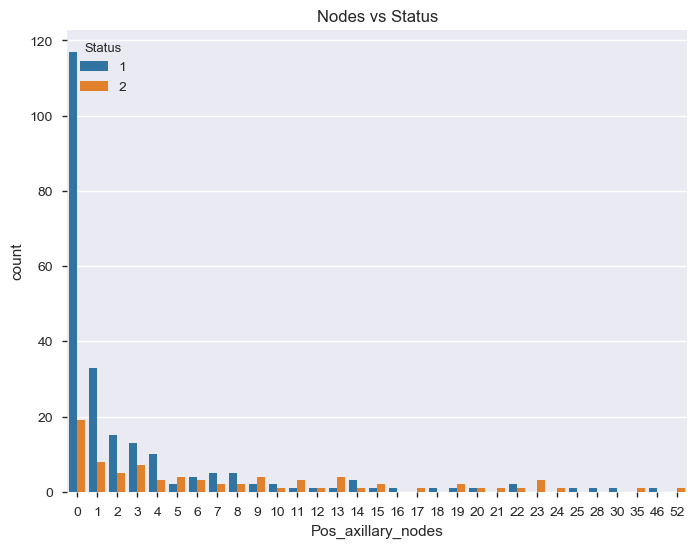

In [60]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = bcs, x = 'Pos_axillary_nodes', hue = 'Status')
plt.title('Nodes vs Status')

In [61]:
bcs['Nodes_Group'] = pd.cut(bcs['Pos_axillary_nodes'].dropna(),
                         [0,10,20,30,40,50],
#                         labels=['<18','18-24','25-34','35-44','45+'], include_lowest=True)
                         labels=['<9','10-19','20-29','30-39','40+'], include_lowest=True)

In [62]:
bcs['Nodes_Group'].count

<bound method Series.count of 0         <9
1         <9
2         <9
3         <9
4         <9
5         <9
6         <9
7         <9
8         <9
9      20-29
10        <9
11        <9
12        <9
13        <9
14     10-19
15        <9
16        <9
17        <9
18        <9
19        <9
20        <9
21        <9
22     10-19
23        <9
24     20-29
25        <9
26        <9
27        <9
28        <9
29        <9
       ...  
276       <9
277       <9
278       <9
279       <9
280       <9
281       <9
282       <9
283       <9
284       <9
285       <9
286       <9
287    10-19
288       <9
289       <9
290       <9
291       <9
292       <9
293       <9
294       <9
295       <9
296       <9
297       <9
298       <9
299       <9
300       <9
301       <9
302       <9
303       <9
304       <9
305       <9
Name: Nodes_Group, Length: 306, dtype: category
Categories (5, object): [<9 < 10-19 < 20-29 < 30-39 < 40+]>

Text(0.5, 1.0, 'Nodes vs Status')

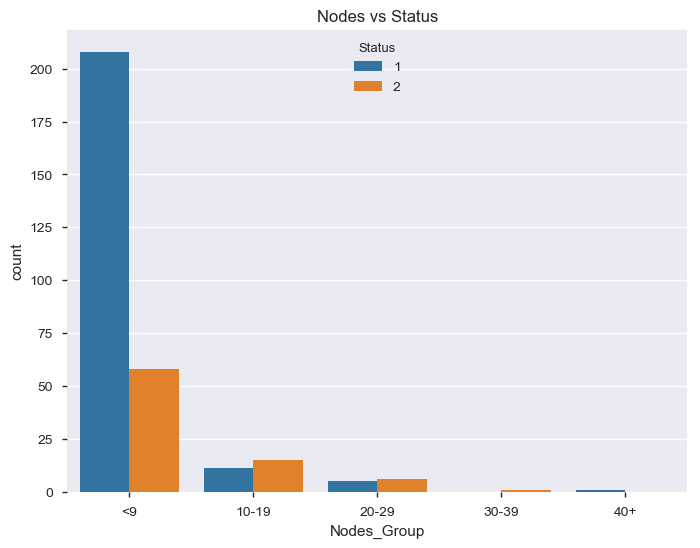

In [63]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = bcs, x = 'Nodes_Group', hue = 'Status')
plt.title('Nodes vs Status')

In [64]:
bcs['Pos_axillary_nodes'].min()


0

In [66]:
bcs['Pos_axillary_nodes'].max()

52

In [89]:
bcs.groupby(['Age','Status'])['Status'].value_counts().sort_values(ascending=False)



Age  Status  Status
52   1       1         10
50   1       1         10
54   1       1          9
38   1       1          9
47   1       1          8
55   1       1          8
57   1       1          8
49   1       1          8
41   1       1          7
42   1       1          7
43   1       1          7
58   1       1          7
59   1       1          7
63   1       1          7
65   1       1          6
61   1       1          6
53   2       2          6
37   1       1          6
45   1       1          6
34   1       1          5
53   1       1          5
64   1       1          5
39   1       1          5
56   1       1          5
70   1       1          5
67   1       1          4
44   1       1          4
52   2       2          4
51   1       1          4
43   2       2          4
                       ..
68   1       1          2
36   1       1          2
73   1       1          2
35   1       1          2
42   2       2          2
34   2       2          2
55   2       2    

In [92]:
bcs.groupby(['Pos_axillary_nodes','Status'])['Status'].value_counts().sort_values(ascending=False)

Pos_axillary_nodes  Status  Status
0                   1       1         117
1                   1       1          33
0                   2       2          19
2                   1       1          15
3                   1       1          13
4                   1       1          10
1                   2       2           8
3                   2       2           7
2                   2       2           5
8                   1       1           5
7                   1       1           5
5                   2       2           4
13                  2       2           4
6                   1       1           4
9                   2       2           4
6                   2       2           3
4                   2       2           3
14                  1       1           3
23                  2       2           3
11                  2       2           3
10                  1       1           2
19                  2       2           2
15                  2       2           2

In [95]:
bcs.groupby(['Years_of_operation','Status'])['Status'].count().sort_values(ascending=False)

Years_of_operation  Status
58                  1         24
60                  1         24
64                  1         23
61                  1         23
66                  1         22
63                  1         22
67                  1         21
59                  1         18
62                  1         16
65                  1         15
                    2         13
58                  2         12
68                  1         10
59                  2          9
63                  2          8
64                  2          8
62                  2          7
69                  1          7
66                  2          6
60                  2          4
67                  2          4
69                  2          4
61                  2          3
68                  2          3
Name: Status, dtype: int64

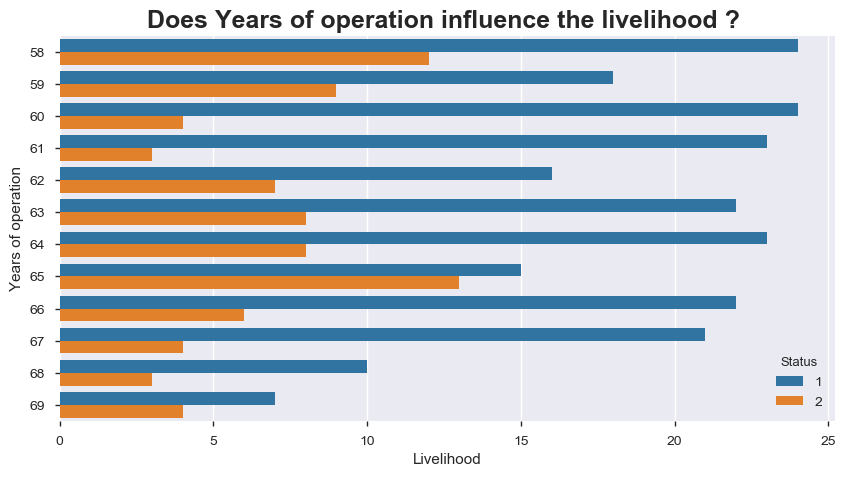

In [119]:
plt.figure(figsize=(10,5))
sns.countplot(y="Years_of_operation", hue="Status", data=bcs)
plt.title("Does Years of operation influence the livelihood ? ",fontsize=18,fontweight="bold")
plt.ylabel("Years of operation")
plt.xlabel("Livelihood")
plt.show()

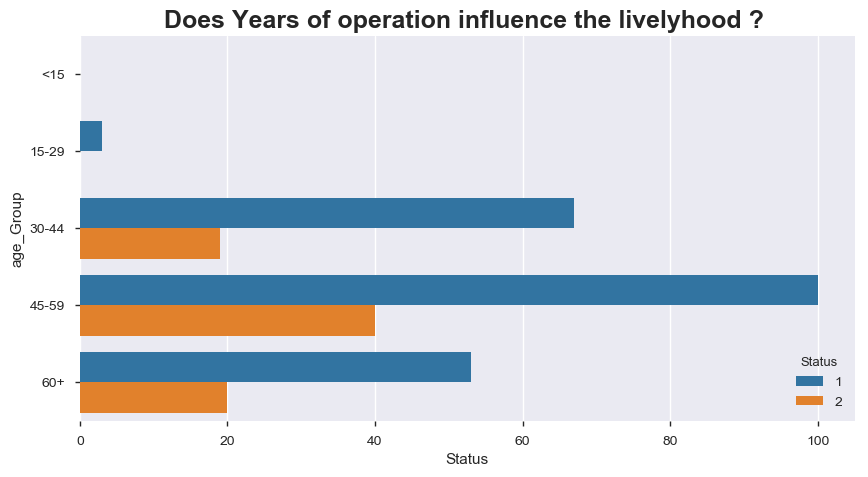

In [110]:
plt.figure(figsize=(10,5))
sns.countplot(y="age_Group", hue="Status", data=bcs)
plt.title("Does Years of operation influence the livelyhood ? ",fontsize=18,fontweight="bold")
plt.ylabel("age_Group")
plt.xlabel("Status")
plt.show()

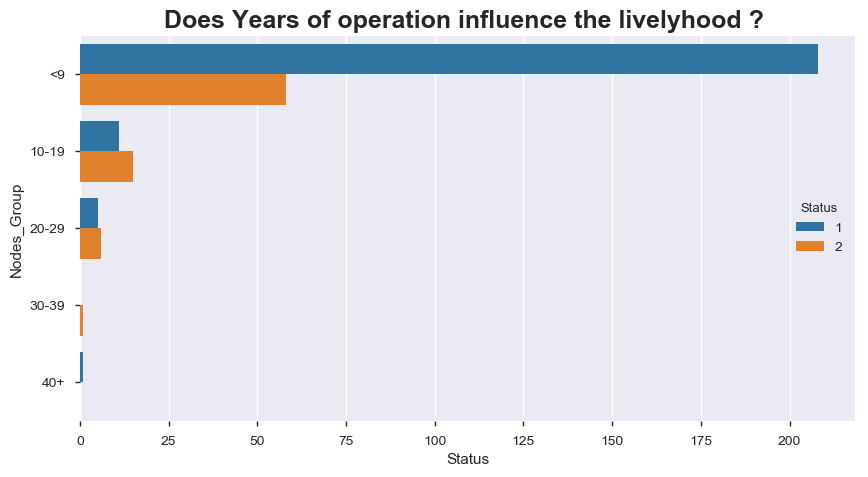

In [111]:
plt.figure(figsize=(10,5))
sns.countplot(y="Nodes_Group", hue="Status", data=bcs)
plt.title("Does Years of operation influence the livelyhood ? ",fontsize=18,fontweight="bold")
plt.ylabel("Nodes_Group")
plt.xlabel("Status")
plt.show()

Text(0.5, 1.0, 'Age Category Vs. Status')

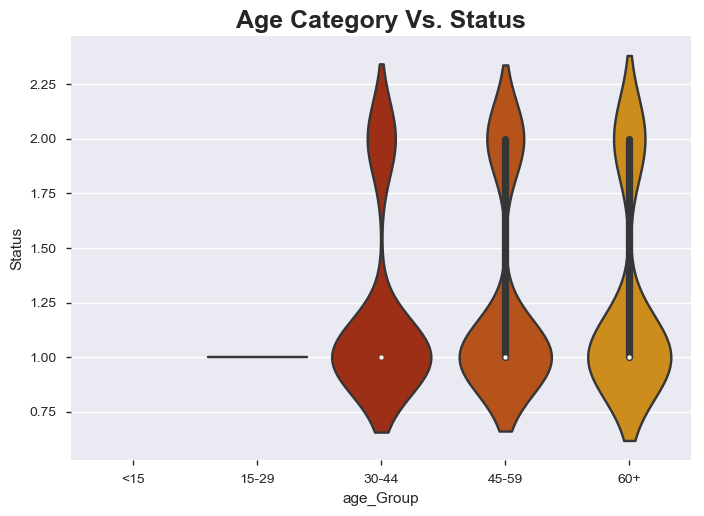

In [112]:
ax = sns.violinplot(x="age_Group", y="Status", palette="gnuplot", data=bcs)
plt.xlabel("age_Group")
plt.ylabel("Status")
plt.title("Age Category Vs. Status", fontsize=18, fontweight = "bold")

In [117]:

print(bcs['age_Group'].unique())

[15-29, 30-44, 45-59, 60+, NaN]
Categories (4, object): [15-29 < 30-44 < 45-59 < 60+]


Text(0.5, 1.0, 'Nodes vs Age')

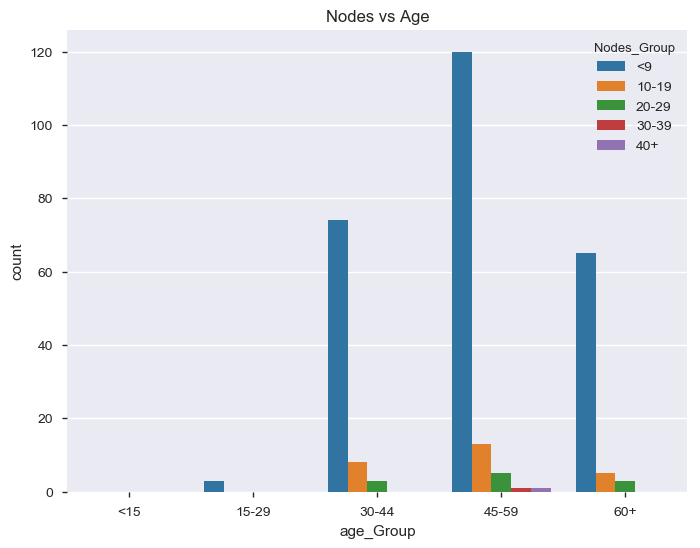

In [125]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = bcs, x = 'age_Group', hue = 'Nodes_Group')
plt.title('Nodes vs Age')

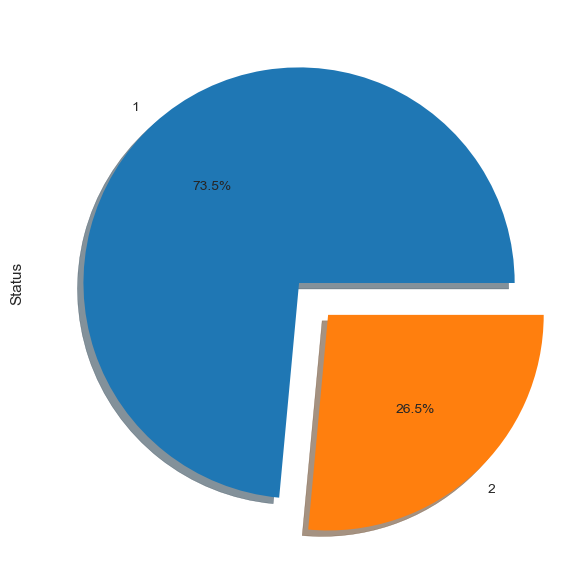

In [137]:
f,ax = plt.subplots(1,1,figsize=(22,7))
bcs['Status'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True)


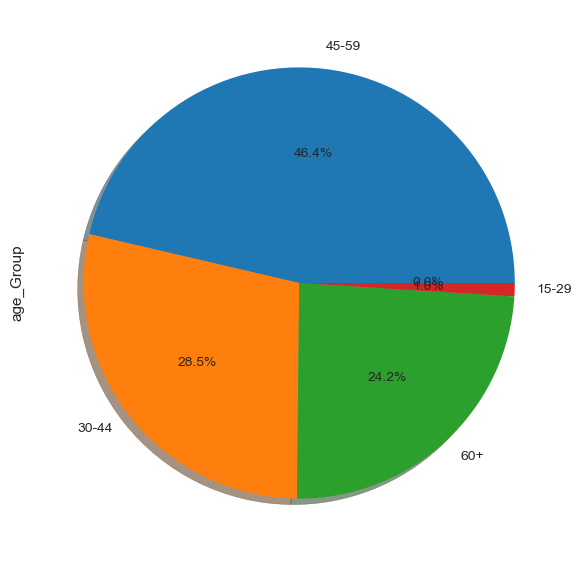

In [149]:
f,ax = plt.subplots(1,1,figsize=(15,7))
bcs['age_Group'].value_counts().plot.pie(explode=[0,0,0,0,0],autopct='%1.1f%%',shadow=True)

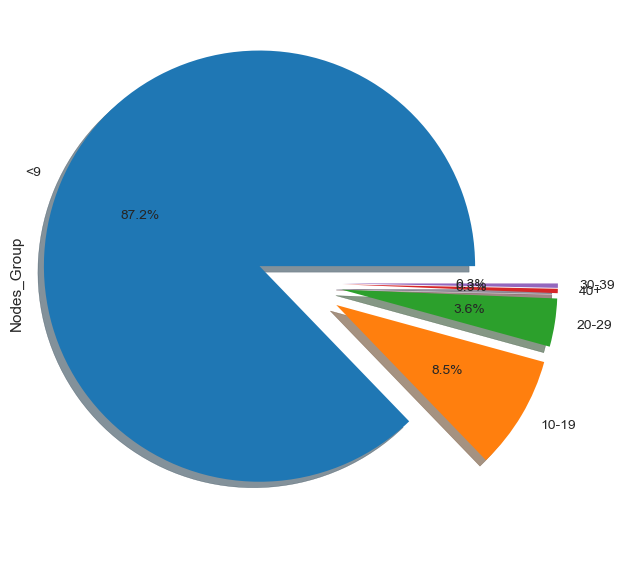

In [147]:
f,ax = plt.subplots(1,1,figsize=(22,7))
bcs['Nodes_Group'].value_counts().plot.pie(explode=[0.2,0.2,0.2,0.2,0.2],autopct='%1.1f%%',shadow=True)

C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Factorplot with kind = "count" for age_Group and Status')

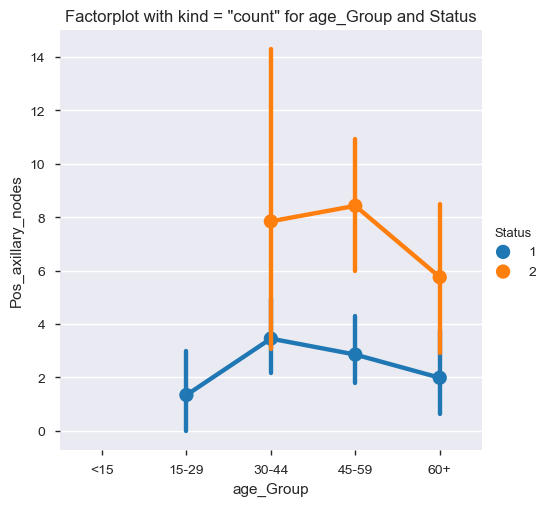

In [152]:
sns.factorplot('age_Group','Pos_axillary_nodes', data=bcs, hue='Status')
plt.title('Factorplot with kind = "count" for age_Group and Status')

C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


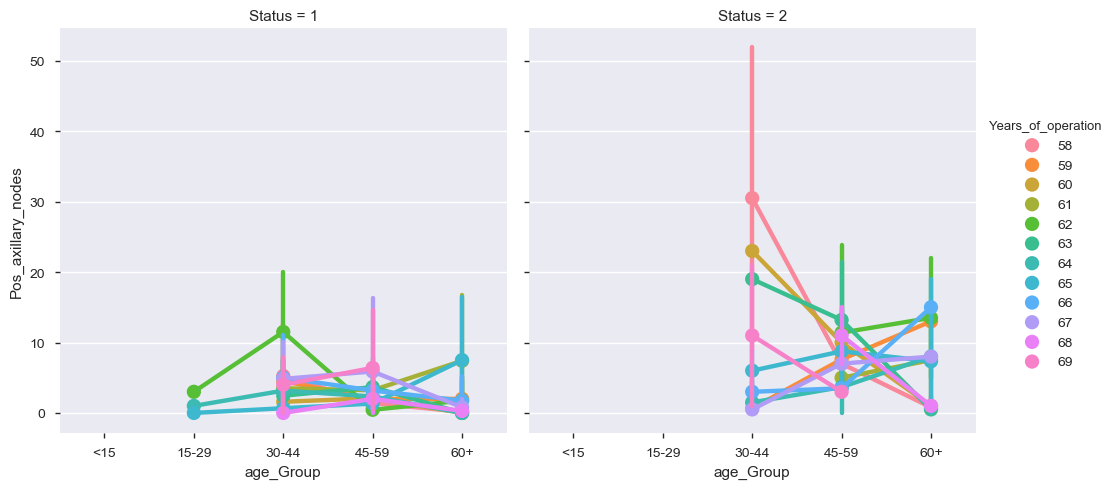

In [159]:
sns.factorplot('age_Group','Pos_axillary_nodes', col='Status', hue= 'Years_of_operation', kind='point', data = bcs)
plt.show()